In [30]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [31]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime, timedelta

# Reflect Tables into SQLAlchemy ORM

In [32]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [33]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [34]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect =True)

C:\Users\12087\AppData\Local\Temp\ipykernel_17184\3613998393.py:5: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect =True)


In [35]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [36]:
# Save references to each table
Measurement = Base.classes.measurement 
Station = Base.classes.station

In [37]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)
session

# Exploratory Precipitation Analysis

In [38]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(f"Newest Data: {most_recent_date}")

# oldest_date =session.query(Measurement.date).order_by(Measurement.date.asc()).first()
# print(f"Oldest Data: {oldest_date}")

Newest Data: ('2017-08-23',)


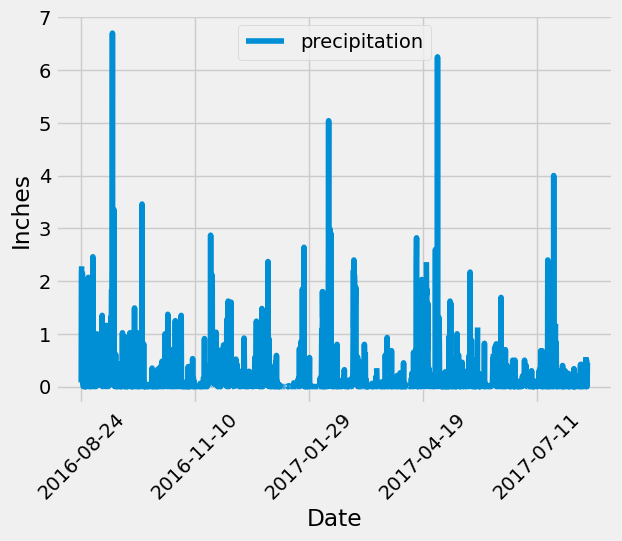

In [39]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
most_recent_date = datetime.strptime(most_recent_date[0], "%Y-%m-%d")
year_prior = most_recent_date - timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
one_year_precip = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date.between(year_prior, most_recent_date)).\
    order_by(Measurement.date).all()
# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_df = pd.DataFrame(one_year_precip, columns =["date", "precipitation"])
# Sort the dataframe by date
precip_df.sort_values(by=["date"])
precip_df= precip_df.set_index("date")
# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot()
plt.ylabel("Inches")
plt.xlabel("Date")
plt.xticks(rotation =45)
plt.show()


In [40]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [41]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station.id).count()

9

In [42]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
stations = session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()

stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [43]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == stations[0][0]).all()

[(54.0, 85.0, 71.66378066378067)]

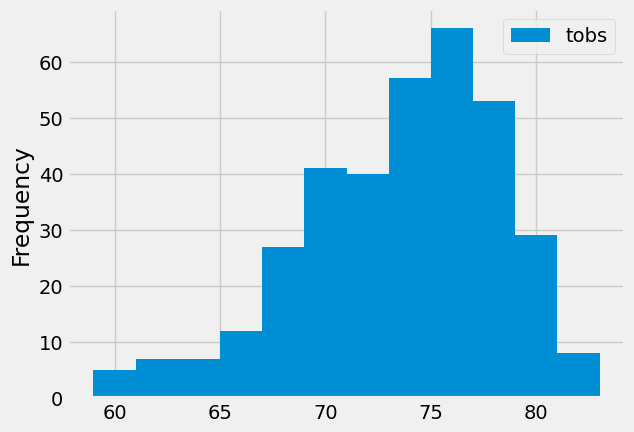

In [44]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
year_filter= session.query(Measurement.tobs).filter(Measurement.date >= "2016-08-23").filter(Measurement.station == stations[0][0]).all()
filter_station_df= pd.DataFrame(year_filter, columns= ["tobs"])
filter_station_df.plot.hist(bins=12)
plt.show()

# Close Session

In [45]:
# Close Session
session.close()